In [14]:
library(PerformanceAnalytics)
library(xts)
library(lubridate)

In [11]:
# load data and create an xts dataset
fund<-read.csv("contrafund.csv")
head(fund)

Date,ContraRet,Market.Return,Risk.Free
1/31/1980,0.024391,0.0631,0.0080
2/29/1980,-0.016874,-0.0033,0.0089
3/31/1980,-0.089431,-0.1169,0.0121
4/30/1980,0.017857,0.0523,0.0126
5/31/1980,0.078947,0.0607,0.0081
6/30/1980,0.011743,0.0367,0.0061


In [12]:
fund$Date<-mdy(fund$Date)
fund2<-fund[order(fund$Date),]
head(fund2)

Date,ContraRet,Market.Return,Risk.Free
1980-01-31,0.024391,0.0631,0.0080
1980-02-29,-0.016874,-0.0033,0.0089
1980-03-31,-0.089431,-0.1169,0.0121
1980-04-30,0.017857,0.0523,0.0126
1980-05-31,0.078947,0.0607,0.0081
1980-06-30,0.011743,0.0367,0.0061


In [13]:
#create an xts dataset
#xts is used to create an xts object from raw data inputs.
All.dat<-xts(fund2[,-1],order.by=fund2[,1],)
head(All.dat)

           ContraRet Market.Return Risk.Free
1980-01-31  0.024391        0.0631    0.0080
1980-02-29 -0.016874       -0.0033    0.0089
1980-03-31 -0.089431       -0.1169    0.0121
1980-04-30  0.017857        0.0523    0.0126
1980-05-31  0.078947        0.0607    0.0081
1980-06-30  0.011743        0.0367    0.0061

,ContraRet,Market.Return,Risk.Free
Cumulative Return,141.5677,69.29182,4.072008


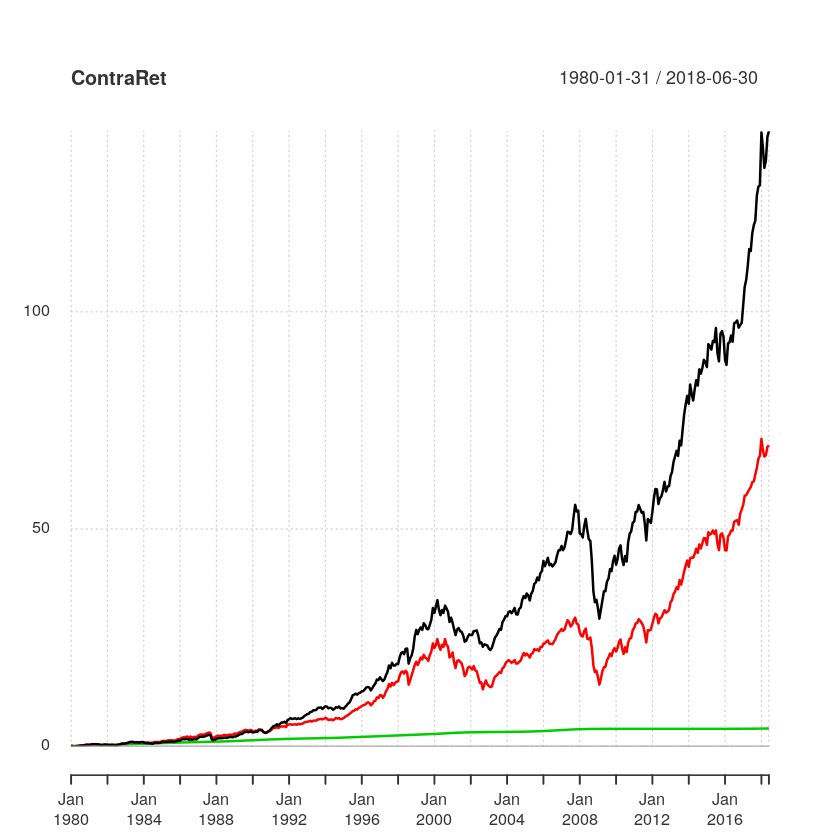

In [19]:
Return.cumulative(All.dat, geometric =TRUE)
chart.CumReturns(All.dat, wealth.index =FALSE, geometric = TRUE)


In [5]:
SharpeRatio(All.dat$ContraRet,All.dat$Risk.Free)
TreynorRatio(All.dat$ContraRet,All.dat$Market.Return,All.dat$Risk.Free)


,ContraRet
"StdDev Sharpe (Rf=0.4%, p=95%):",0.19010682
"VaR Sharpe (Rf=0.4%, p=95%):",0.12900607
"ES Sharpe (Rf=0.4%, p=95%):",0.05971594


[1] 0.1005838

In [18]:
SharpeRatio(All.dat$Market.Return,All.dat$Risk.Free) #professor has done this calculation in her talk.


,Market.Return
"StdDev Sharpe (Rf=0.4%, p=95%):",0.15289134
"VaR Sharpe (Rf=0.4%, p=95%):",0.09804534
"ES Sharpe (Rf=0.4%, p=95%):",0.05806423


In [6]:
# for Jensen method of risk adjusted performance, we need to do some subtraction.
All.dat<-transform(All.dat,MktExcess=Market.Return-Risk.Free,FundExcess=ContraRet-Risk.Free)


In [7]:
Alpha=lm(FundExcess~MktExcess,data=All.dat)
summary(Alpha)



Call:
lm(formula = FundExcess ~ MktExcess, data = All.dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.087553 -0.009588  0.001373  0.010343  0.060880 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0021850  0.0008362   2.613  0.00927 ** 
MktExcess   0.9013625  0.0188580  47.797  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01777 on 460 degrees of freedom
Multiple R-squared:  0.8324,	Adjusted R-squared:  0.832 
F-statistic:  2285 on 1 and 460 DF,  p-value: < 2.2e-16
